#### Expected Value

$
\textbf{Given: } Z = (0.5)^{-Y} = 2^{Y}, \quad Y \sim \text{Geom}(p=0.5).
$


For a geometric random variable Y with parameter  p=0.5

$
P(Y=k) = (1-p)^{k-1} p = (0.5)^k, \quad k=1,2,\dots
$

Thus,
$
E[Z] = E\bigl((0.5)^{-Y}\bigr) = E\bigl(2^{Y}\bigr)
      = \sum_{k=1}^{\infty} 2^{k} \, P(Y = k)
      = \sum_{k=1}^{\infty} 2^{k} \, (0.5)^{k}.
$

NOTE  2^{k} \, (0.5)^{k} = (2 \times 0.5)^{k} = 1^{k} = 1.
So,
$
E[Z] = \sum_{k=1}^{\infty} 1 = \infty.
$

Thus the expected value of Z  diverges and is infinite.


#### Variance

$
\textbf{Variance: } \text{Var}(Z) = E[Z^{2}] - (E[Z])^{2}.
$

Note with the manipulation of exponents, consider $E[Z^{2}]$.

We have $Z^2 = 2^{2Y} = 4^{Y}$
Thus

$
E[Z^2] = E\bigl(4^{Y}\bigr) = \sum_{k=1}^{\infty} 4^{k} \, P(Y=k)
       = \sum_{k=1}^{\infty} 4^{k} \,(0.5)^{k}.
$

$
4^{k} \,(0.5)^{k} = (4 \dot 0.5)^{k} = 2^{k}.
$


Hence


$E[Z^2] = \sum_{k=1}^{\infty} 2^{k}.$



This sum also diverges (it is a geometric series with ratio  $> 1$ ).


$
E[Z^2] = \infty.
$


Since  $E[Z] = \infty$ and  $E[Z^2] = \infty$, 



$\mathbf{Var}(Z) = E[Z^2] - (E[Z])^{2} = \infty$

Variance is infinity


Sample mean of Z (with 1000000 samples): 21.469338
Sample variance of Z (with 1000000 samples): 5740693.090726934


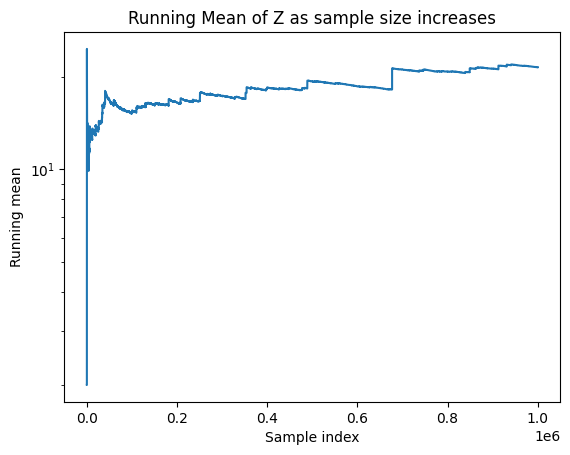

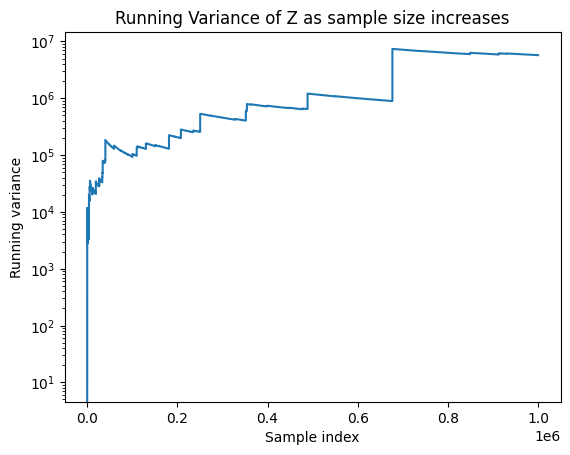

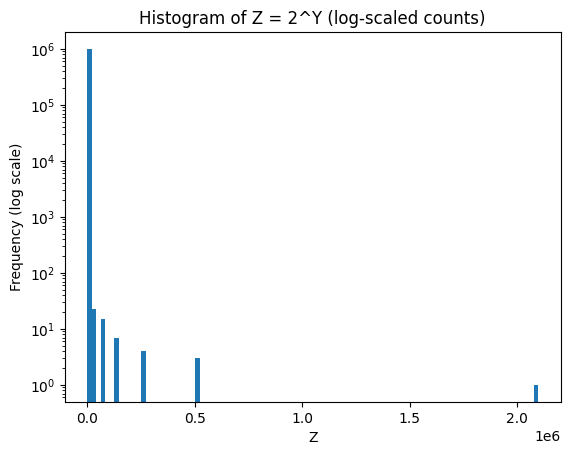

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Generate samples of Y
#    Y is the trial count up to and including the first tail (p=0.5).
#    We'll do this in a vectorized way:
#      - For each sample, count how many Heads (0) appear before the first Tail (1).
#      - Alternatively, you can keep flipping in a loop, but that's slower.
#
#    An efficient approach: The probability that Y=k is (0.5)^k.
#    We can invert a uniform random variable to generate Y.

def sample_Y_geom(p=0.5, size=10_000_00):
    # Y takes values 1, 2, 3, ... with P(Y=k) = (1-p)^(k-1) * p
    # If p=0.5, P(Y=k) = (0.5)^k
    # We'll use the inverse transform method:
    #   U ~ Uniform(0,1). Then Y = smallest k s.t. sum_{j=1..k} (0.5^j) >= U, etc.
    #
    # A simpler approach: number of Bernoulli(0.5) trials until first success
    # can be done with a geometric distribution generator in NumPy
    #  (but note that different libraries define "Geom(p)" differently)
    #
    # For np.random.geometric, p is the success probability.
    # So we can do:
    return np.random.geometric(p, size=size)

n_samples = 1_000_000
Y_samples = sample_Y_geom(p=0.5, size=n_samples)

# 2) Compute Z = 2^Y
Z_samples = 2**Y_samples

# 3) Compute sample mean and sample variance
#    (They should be very large, and as n grows, the mean/variance won't converge)
sample_mean = np.mean(Z_samples)
sample_var  = np.var(Z_samples, ddof=1)  # sample variance with Bessel's correction

print(f"Sample mean of Z (with {n_samples} samples): {sample_mean}")
print(f"Sample variance of Z (with {n_samples} samples): {sample_var}")

# 4) Show how these estimates evolve as we take more samples
running_means = []
running_vars = []
running_sum = 0.0
running_sum_sq = 0.0

for i in range(1, n_samples+1):
    z_i = Z_samples[i-1]
    running_sum += z_i
    running_sum_sq += z_i**2
    # Mean up to i
    mean_i = running_sum / i
    # Var up to i
    if i > 1:
        var_i = (running_sum_sq - i*mean_i**2) / (i-1)
    else:
        var_i = 0
    running_means.append(mean_i)
    running_vars.append(var_i)

# Plot the running mean
plt.figure()
plt.plot(running_means)
plt.title("Running Mean of Z as sample size increases")
plt.xlabel("Sample index")
plt.ylabel("Running mean")
plt.yscale("log")  # log-scale to see the growth more clearly
plt.show()

# Plot the running variance
plt.figure()
plt.plot(running_vars)
plt.title("Running Variance of Z as sample size increases")
plt.xlabel("Sample index")
plt.ylabel("Running variance")
plt.yscale("log")  # also log-scale
plt.show()

# 5) Plot a histogram of Z. Because of extremely large outliers,
#    it's often best to use a log scale on the x-axis or y-axis.
plt.figure()
plt.hist(Z_samples, bins=100, log=True)
plt.title("Histogram of Z = 2^Y (log-scaled counts)")
plt.xlabel("Z")
plt.ylabel("Frequency (log scale)")
plt.show()


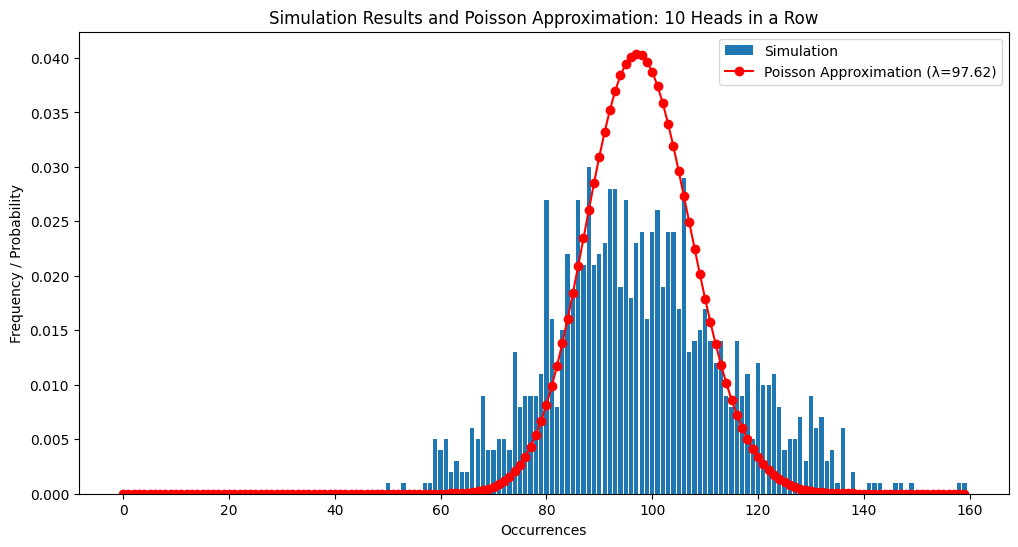

Average occurrences in simulation: 97.622


In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

def simulate_coin_flips(num_flips):
    """Simulates coin flips and counts occurrences of 10 heads in a row."""
    flips = [random.choice([0, 1]) for _ in range(num_flips)]  # 0: tails, 1: heads
    occurrences = 0
    for i in range(num_flips - 9):
        if flips[i:i + 10] == [1] * 10:
            occurrences += 1
    return occurrences

def run_simulation(num_trials, num_flips):
    """Runs multiple simulations and returns a list of occurrences."""
    occurrences = [simulate_coin_flips(num_flips) for _ in range(num_trials)]
    return occurrences

def poisson_approximation(occurrences):
    """Calculates the Poisson distribution approximation."""
    average_occurrences = np.mean(occurrences)
    max_occurrences = max(occurrences)
    poisson_probs = poisson.pmf(range(max_occurrences + 1), average_occurrences)
    return poisson_probs, average_occurrences, max_occurrences

# Simulation parameters
num_trials = 1000  # Number of simulation runs
num_flips = 100000  # Number of coin flips per simulation

# Run the simulation
occurrences = run_simulation(num_trials, num_flips)

# Poisson approximation
poisson_probs, average_occurrences, max_occurrences = poisson_approximation(occurrences)

# Plotting
plt.figure(figsize=(12, 6))

# Histogram of simulation results with Poisson distribution overlay
plt.hist(occurrences, bins=range(max(occurrences) + 2), align='left', rwidth=0.8, density=True, label="Simulation")
plt.plot(range(max_occurrences + 1), poisson_probs, 'ro-', label=f"Poisson Approximation (λ={average_occurrences:.2f})")
plt.title("Simulation Results and Poisson Approximation: 10 Heads in a Row")
plt.xlabel("Occurrences")
plt.ylabel("Frequency / Probability")
plt.legend()
plt.show()

print(f"Average occurrences in simulation: {average_occurrences}")
